# Text Mining and Sentiment Analysis with NLTK

## Python setup

You will need to install some modules in a Anaconda environment of your choice:

---

[NLTK](https://www.nltk.org/) (Natural Language Toolkit) 

```bash
conda install nltk
```

---

[Wordcloud](https://amueller.github.io/word_cloud/):

```bash
conda install wordcloud
```

---

In [142]:
# we suppress some unimportant warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Data

### Data import

In [97]:
import pandas as pd

# Import some Tweets from Elon Musk 
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/twitter-tweepy/main/tweets.csv")
df.head(3)

,Unnamed: 0,created_at,id,author_id,text
0,0,2021-12-10T07:20:45.000Z,1469205428227784711,44196397,@Albi_SideArms maybe i will …
1,1,2021-12-10T07:19:05.000Z,1469205011687223298,44196397,@jack https://t.co/ueyR6NAwap
2,2,2021-12-10T06:44:19.000Z,1469196261953884160,44196397,@SawyerMerritt 🤣🤣


### Data corrections

In [98]:
df['text'] = df['text'].astype(str).str.lower()
df.head(3)

,Unnamed: 0,created_at,id,author_id,text
0,0,2021-12-10T07:20:45.000Z,1469205428227784711,44196397,@albi_sidearms maybe i will …
1,1,2021-12-10T07:19:05.000Z,1469205011687223298,44196397,@jack https://t.co/ueyr6nawap
2,2,2021-12-10T06:44:19.000Z,1469196261953884160,44196397,@sawyermerritt 🤣🤣


In [99]:
df['created_at'] = pd.to_datetime(df['created_at'])

## Text mining data preparation

### Tokenization


- We use NLTK's [RegexpTokenizer](https://www.nltk.org/_modules/nltk/tokenize/regexp.html) to perform [tokenization](https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization) in combination with regular expressions. 

- To learn more about regular expressions ("regexp"), visit the following sites:


- [regular expression basics](https://www.w3schools.com/python/python_regex.asp).
- [interactive regular expressions tool](https://regex101.com/)


- `\w+` matches Unicode word characters with one or more occurrences; 
- this includes most characters that can be part of a word in any language, as well as numbers and the underscore.

In [100]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df.head(3)


,Unnamed: 0,created_at,id,author_id,text,text_token
0,0,2021-12-10 07:20:45+00:00,1469205428227784711,44196397,@albi_sidearms maybe i will …,"[albi_sidearms, maybe, i, will]"
1,1,2021-12-10 07:19:05+00:00,1469205011687223298,44196397,@jack https://t.co/ueyr6nawap,"[jack, https, t, co, ueyr6nawap]"
2,2,2021-12-10 06:44:19+00:00,1469196261953884160,44196397,@sawyermerritt 🤣🤣,[sawyermerritt]


### Stopwords

- Stop words are words in a stop list which are dropped before analysing natural language data since they don't contain valuable information (like "will", "and", "or", "has", ...).

In [101]:
import nltk

# download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
import nltk
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

- We use a [lambda function](https://www.w3schools.com/python/python_lambda.asp) to remove the stopwords:

In [103]:
# Remove stopwords
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

,Unnamed: 0,created_at,id,author_id,text,text_token
0,0,2021-12-10 07:20:45+00:00,1469205428227784711,44196397,@albi_sidearms maybe i will …,"[albi_sidearms, maybe]"
1,1,2021-12-10 07:19:05+00:00,1469205011687223298,44196397,@jack https://t.co/ueyr6nawap,"[jack, co, ueyr6nawap]"
2,2,2021-12-10 06:44:19+00:00,1469196261953884160,44196397,@sawyermerritt 🤣🤣,[sawyermerritt]


In [ ]:
df.head(3)

### Remove infrequent words

- We remove words which occur less then two times. 
- Note that this operation changes the data format of our column `text_token` (notice the missing brackets).

In [104]:
df['text_token'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

,Unnamed: 0,created_at,id,author_id,text,text_token
0,0,2021-12-10 07:20:45+00:00,1469205428227784711,44196397,@albi_sidearms maybe i will …,albi_sidearms maybe
1,1,2021-12-10 07:19:05+00:00,1469205011687223298,44196397,@jack https://t.co/ueyr6nawap,jack ueyr6nawap
2,2,2021-12-10 06:44:19+00:00,1469196261953884160,44196397,@sawyermerritt 🤣🤣,sawyermerritt


In [ ]:
df.head(3)

### Lemmatization

- Next, we perform [lemmatization](https://en.wikipedia.org/wiki/Lemmatisation).

In [105]:
# we need to download some packages
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [106]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_token'] = df['text_token'].apply(wordnet_lem.lemmatize)

## Data visualization

### Word cloud

[Word cloud example gallery](https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery)

In [107]:
# combine all words 
all_words = ' '.join([word for word in df['text_token']])

In [108]:
all_words

'albi_sidearms maybe jack ueyr6nawap sawyermerritt sawyermerritt tesla china done amazing work mrbeast planet4589 earth called water samifouad tobyliiiiiiiiii noobtoob thinking quitting jobs amp becoming influencer full time wdyt zrz1eflywy teslaownerssv billym2k thecryptocpa ballaerospace nasa_marshall nasa spacex congrats _rykllan spacex felixschlang marcushouse erdayastronaut bluemoondance74 nexthorizonssf rocket fleets grows squawkcnbc gordonjohnson19 rainmaker1973 amazing engine cnunezimages spacex spaceintellige3 rainmaker1973 shanghai beautiful ppathole probably way sooner hot civilization unless susceptible extreme natural disasters nuclear power plants shut watcherguru taxing billionaires 100 drops national debt one year deficit spending watcherguru scary something got give nothing permanent temporary government program traderjourney exactly lot accounting trickery bill disclosed public temporary provisions build back better act become permanent national debt increase kkdpc45j

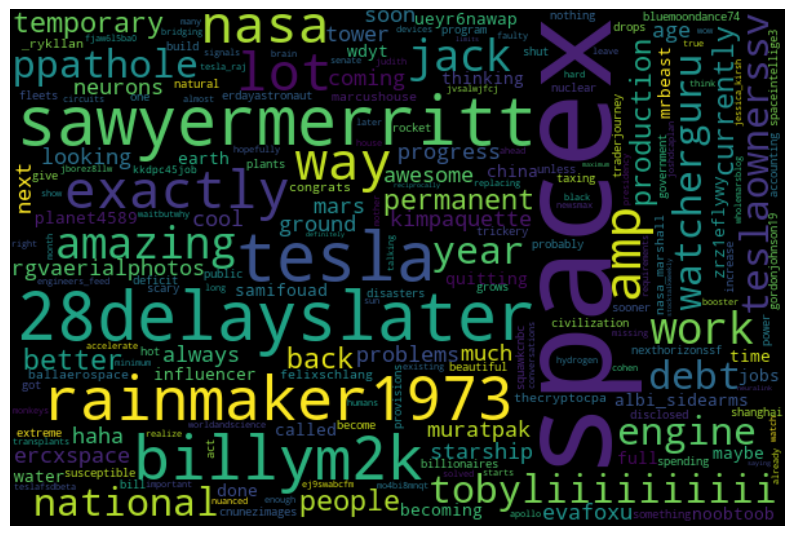

In [153]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

- Different style:

<function matplotlib.pyplot.show(close=None, block=None)>

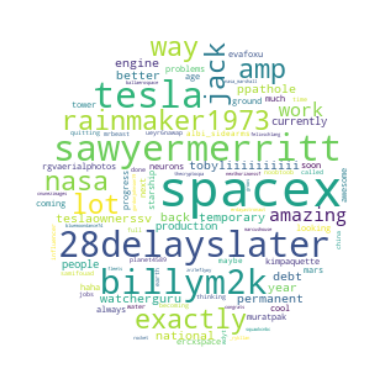

In [152]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

### Frequency distributions

In [111]:
# download the package
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jankirenz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words)
fd = FreqDist(words)

In [113]:
words

['albi_sidearms',
 'maybe',
 'jack',
 'ueyr6nawap',
 'sawyermerritt',
 'sawyermerritt',
 'tesla',
 'china',
 'done',
 'amazing',
 'work',
 'mrbeast',
 'planet4589',
 'earth',
 'called',
 'water',
 'samifouad',
 'tobyliiiiiiiiii',
 'noobtoob',
 'thinking',
 'quitting',
 'jobs',
 'amp',
 'becoming',
 'influencer',
 'full',
 'time',
 'wdyt',
 'zrz1eflywy',
 'teslaownerssv',
 'billym2k',
 'thecryptocpa',
 'ballaerospace',
 'nasa_marshall',
 'nasa',
 'spacex',
 'congrats',
 '_rykllan',
 'spacex',
 'felixschlang',
 'marcushouse',
 'erdayastronaut',
 'bluemoondance74',
 'nexthorizonssf',
 'rocket',
 'fleets',
 'grows',
 'squawkcnbc',
 'gordonjohnson19',
 'rainmaker1973',
 'amazing',
 'engine',
 'cnunezimages',
 'spacex',
 'spaceintellige3',
 'rainmaker1973',
 'shanghai',
 'beautiful',
 'ppathole',
 'probably',
 'way',
 'sooner',
 'hot',
 'civilization',
 'unless',
 'susceptible',
 'extreme',
 'natural',
 'disasters',
 'nuclear',
 'power',
 'plants',
 'shut',
 'watcherguru',
 'taxing',
 'billi

In [114]:
fd

FreqDist({'spacex': 7, 'sawyermerritt': 5, 'tesla': 5, '28delayslater': 5, 'billym2k': 4, 'rainmaker1973': 4, 'amp': 3, 'nasa': 3, 'way': 3, 'exactly': 3, ...})

### Most common words

In [115]:
fd.most_common(3)

[('spacex', 7), ('sawyermerritt', 5), ('tesla', 5)]

In [116]:
fd.tabulate(3)

       spacex sawyermerritt         tesla 
            7             5             5 


### Plot common words

In [117]:
# Obtain top 10 words
top_10 = fd.most_common(10)
top_10

[('spacex', 7),
 ('sawyermerritt', 5),
 ('tesla', 5),
 ('28delayslater', 5),
 ('billym2k', 4),
 ('rainmaker1973', 4),
 ('amp', 3),
 ('nasa', 3),
 ('way', 3),
 ('exactly', 3)]

In [118]:
# make a pandas datframe
df_dist = pd.DataFrame({"value":dict(top_10)})
df_dist

,value
28delayslater,5
amp,3
billym2k,4
exactly,3
nasa,3
rainmaker1973,4
sawyermerritt,5
spacex,7
tesla,5
way,3


In [119]:
# reset index
df_dist.reset_index(inplace=True)

df_dist

,index,value
0,28delayslater,5
1,amp,3
2,billym2k,4
3,exactly,3
4,nasa,3
5,rainmaker1973,4
6,sawyermerritt,5
7,spacex,7
8,tesla,5
9,way,3


In [143]:
import altair as alt

alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value"),
    y=alt.Y("index", sort="-x")
)

alt.Chart(...)

### Search specific words

In [121]:
# Show frequency of a specific word
fd["nasa"]

3

## Sentiment analysis

### VADER lexicon

- NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for "Valence Aware Dictionary and Sentiment Reasoner" (Hutto & Gilbert, 2014).

In [122]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jankirenz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Sentiment 

### Sentiment Intensity Analyzer

- Initialize an object of `SentimentIntensityAnalyzer` with name "analyzer":

In [123]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

### Polarity scores

- Use the `polarity_scores` method:

In [124]:
df['polarity'] = df['text_token'].apply(lambda x: analyzer.polarity_scores(x))

,Unnamed: 0,created_at,id,author_id,text,text_token,polarity
0,0,2021-12-10 07:20:45+00:00,1469205428227784711,44196397,@albi_sidearms maybe i will …,albi_sidearms maybe,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,1,2021-12-10 07:19:05+00:00,1469205011687223298,44196397,@jack https://t.co/ueyr6nawap,jack ueyr6nawap,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2,2021-12-10 06:44:19+00:00,1469196261953884160,44196397,@sawyermerritt 🤣🤣,sawyermerritt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
df.head(3)

### Transform data

In [125]:
# Change data structure (we drop some columns and unnest the column polarity )
df = pd.concat(
    [df.drop(['Unnamed: 0', 'id', 'author_id', 'polarity'], axis=1),  # drop some columns
     df['polarity'].apply(pd.Series)], axis=1) # unnest polarity and concatenate with df

,created_at,text,text_token,neg,neu,pos,compound
0,2021-12-10 07:20:45+00:00,@albi_sidearms maybe i will …,albi_sidearms maybe,0.0,1.0,0.0,0.0
1,2021-12-10 07:19:05+00:00,@jack https://t.co/ueyr6nawap,jack ueyr6nawap,0.0,1.0,0.0,0.0
2,2021-12-10 06:44:19+00:00,@sawyermerritt 🤣🤣,sawyermerritt,0.0,1.0,0.0,0.0


In [ ]:
df.head(3)

In [126]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

,created_at,text,text_token,neg,neu,pos,compound,sentiment
0,2021-12-10 07:20:45+00:00,@albi_sidearms maybe i will …,albi_sidearms maybe,0.0,1.000,0.000,0.0000,neutral
1,2021-12-10 07:19:05+00:00,@jack https://t.co/ueyr6nawap,jack ueyr6nawap,0.0,1.000,0.000,0.0000,neutral
2,2021-12-10 06:44:19+00:00,@sawyermerritt 🤣🤣,sawyermerritt,0.0,1.000,0.000,0.0000,neutral
3,2021-12-10 04:42:00+00:00,@sawyermerritt tesla china has done amazing work,sawyermerritt tesla china done amazing work,0.0,0.568,0.432,0.5859,positive


In [ ]:
df.head(4)

### Analyze data

In [127]:
# Tweet with highest positive sentiment
df.loc[df['compound'].idxmax()].values

array([Timestamp('2021-12-07 03:11:40+0000', tz='UTC'),
       '@stocktalkweekly @neuralink i am definitely not saying that we can for sure do this, but i am increasingly confident that it is possible',
       'stocktalkweekly neuralink definitely saying sure increasingly confident possible',
       0.0, 0.379, 0.621, 0.802, 'positive'], dtype=object)

In [128]:
# Tweet with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
df.loc[df['compound'].idxmin()].values

array([Timestamp('2021-12-08 21:04:14+0000', tz='UTC'),
       '@watcherguru taxing all billionaires at 100% only drops national debt by ~10%, which is just one year of deficit spending',
       'watcherguru taxing billionaires 100 drops national debt one year deficit spending',
       0.366, 0.634, 0.0, -0.6369, 'negative'], dtype=object)

### Visualize data

In [155]:
# create data to change colors in Altair plot
domain = ['neutral', 'positive', 'negative']
range_=['#b2d8d8',"#008080", '#db3d13']


alt.Chart(df).mark_bar().encode(
    x=alt.X('count()', title=None),
    y=alt.Y('sentiment', sort="-x"),
    color= alt.Color('sentiment', legend=None, scale=alt.Scale(domain=domain, range=range_))
).properties(
    title="Sentiment analysis",
    width=400,
    height=150,
)

alt.Chart(...)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   created_at  72 non-null     datetime64[ns, UTC]
 1   text        72 non-null     object             
 2   text_token  72 non-null     object             
 3   neg         72 non-null     float64            
 4   neu         72 non-null     float64            
 5   pos         72 non-null     float64            
 6   compound    72 non-null     float64            
 7   sentiment   72 non-null     object             
dtypes: datetime64[ns, UTC](1), float64(4), object(3)
memory usage: 4.6+ KB


In [144]:
alt.Chart(df).mark_line().encode(
   x=alt.X('created_at:T'),
   y=alt.Y('compound'),
   color=alt.Color('sentiment', scale=alt.Scale(domain=domain, range=range_))
)

alt.Chart(...)

In [150]:
alt.Chart(df).mark_boxplot().encode(
    x=alt.X('sentiment'),
    y=alt.Y('compound'),
    color=alt.Color('sentiment', scale=alt.Scale(domain=domain, range=range_))
).properties(
    width=200,
    height=200
)

alt.Chart(...)

Literature:

[Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.](https://ojs.aaai.org/index.php/ICWSM/article/view/14550)